In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [79]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [80]:
df = pd.concat([X, y], axis=1)

In [81]:
df.count()

cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  5644
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
poisonous                   8124
dtype: int64

In [82]:
df = df.dropna()

In [83]:
df.count()

cap-shape                   5644
cap-surface                 5644
cap-color                   5644
bruises                     5644
odor                        5644
gill-attachment             5644
gill-spacing                5644
gill-size                   5644
gill-color                  5644
stalk-shape                 5644
stalk-root                  5644
stalk-surface-above-ring    5644
stalk-surface-below-ring    5644
stalk-color-above-ring      5644
stalk-color-below-ring      5644
veil-type                   5644
veil-color                  5644
ring-number                 5644
ring-type                   5644
spore-print-color           5644
population                  5644
habitat                     5644
poisonous                   5644
dtype: int64

In [84]:
label_encoder = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

In [85]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,2,0,...,5,5,0,0,1,3,1,3,5,1
1,5,2,7,1,0,1,0,0,2,0,...,5,5,0,0,1,3,2,2,1,0
2,0,2,6,1,3,1,0,0,3,0,...,5,5,0,0,1,3,2,2,3,0
3,5,3,6,1,6,1,0,1,3,0,...,5,5,0,0,1,3,1,3,5,1
4,5,2,3,0,5,1,1,0,2,1,...,5,5,0,0,1,0,2,0,1,0


In [86]:
df["veil-type"].value_counts()

veil-type
0    5644
Name: count, dtype: int64

In [87]:
def count_entropy(column: pd.Series, total: int) -> float:
    res: float = 0.0
    for num in column:
        if (num == 0):
            continue
        res += (num / total) * np.log2((num / total))
    return -res


def calculate_gain_ratio(data_set: pd.DataFrame, column: str, target_column: str) -> float:
    column_entropy = count_entropy(data_set[column].value_counts(), data_set[column].size)
    if column_entropy == 0:
        return 0.0
    
    
    column_values: pd.Series[int] = data_set[column].value_counts()
    entropy_before: float = count_entropy(data_set[target_column].value_counts(), data_set[target_column].size)

    entropy_after:float = 0
    for colunm_value in column_values.keys():

        weight: float =  column_values[colunm_value] / data_set[target_column].size
        entropy_after += weight *  count_entropy(data_set[data_set[column] == colunm_value][target_column].value_counts(), column_values[colunm_value])
    


    return (entropy_before - entropy_after)/column_entropy

In [88]:
for column in df.columns:
    if column == "poisonous":
        continue
    print(column, calculate_gain_ratio(df, column, "poisonous"))

cap-shape 0.012959187840271754
cap-surface 0.002949363963392213
cap-color 0.07879934350522409
bruises 0.14172551860073812
odor 0.43547303887143163
gill-attachment 0.14302901664370626
gill-spacing 0.08542450766677998
gill-size 0.059743351643941706
gill-color 0.07728533192370692
stalk-shape 0.27511935870288545
stalk-root 0.07230324864596836
stalk-surface-above-ring 0.34042710897522616
stalk-surface-below-ring 0.28433254913959377
stalk-color-above-ring 0.16251124775059977
stalk-color-below-ring 0.1461896381716539
veil-type 0.0
veil-color 0.12747574898391514
ring-number 0.05912882732670716
ring-type 0.33830664650592723
spore-print-color 0.3153606521802043
population 0.05381483313871895
habitat 0.052081377757015754


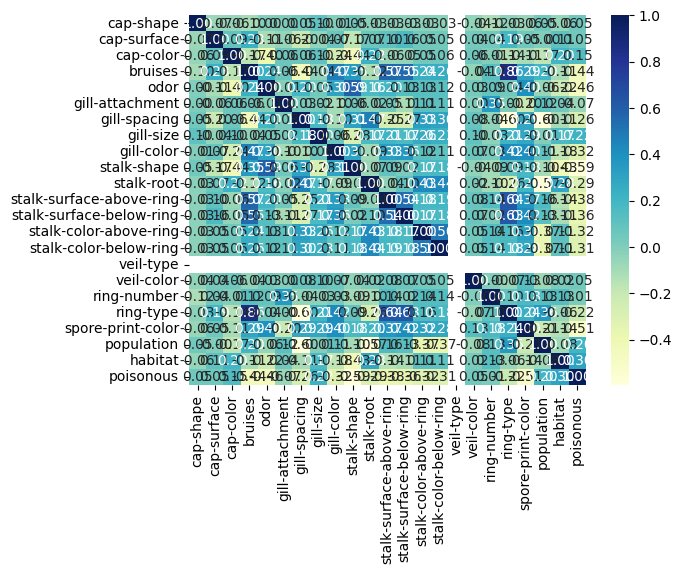

<Figure size 800x600 with 0 Axes>

In [89]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f") 
# displaying heatmap 
plt.figure(figsize=(8, 6))
plt.show() 

In [90]:
target = "poisonous"
correlations = df.corr()[target].abs()
threshold = 0.3

selected_features = correlations[correlations > threshold].index.tolist()
print(selected_features)

['bruises', 'odor', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'spore-print-color', 'poisonous']


In [91]:
result_data = df[selected_features]

In [92]:
result_data.to_csv("mashrooms_in.csv", index= False)